# Praca domowa 6

## Zadanie 1


In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [100]:
median_grade = df['grade'].median()
(df
 .loc[(df['waterfront'] == 1) 
      & (df['grade'] >= median_grade), 'price']
 .mean()
 .round(2)
)

1784151.7

Odp: **1784151.70 USD**.

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [92]:
(df
 .groupby('floors')
 .agg({'bathrooms': 'median'})
)

,bathrooms
floors,
1.0,1.750
1.5,1.750
2.0,2.500
2.5,2.500
3.0,2.500
3.5,2.625


Odp: **Nie**.

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [93]:
center_lat = (df['lat'].min() + df['lat'].max()) / 2
(df
 .loc[df['lat'] > center_lat]
 .groupby('waterfront')
 .agg({'grade': 'describe'})
)

grade                                               
              count      mean       std  min  25%  50%   75%   max
waterfront                                                        
0           16198.0  7.719965  1.217724  1.0  7.0  8.0   8.0  13.0
1             115.0  9.139130  1.695644  5.0  8.0  9.0  10.0  12.0

Odp: Bez widoku na wodę: **Q1 = 7, Q3 = 8**. Z widokiem na wodę: **Q1 = 8, Q3 = 10**.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [94]:
def IQR(s):
    Q1, Q3 = np.percentile(s, [25, 75])
    return Q3 - Q1


(df
 .groupby('zipcode')
 .agg({'id': 'count', 'price': IQR})
 .loc[lambda df: df.idxmax()]
)

,id,price
zipcode,,
98103,602,262875.0
98039,50,1155250.0


Odp: Najwięcej nieruchomości jest pod adresem **98103**, gdzie dla cen **IQR = 262875.00 USD**

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [95]:
count_greater_lot15 = (
    df
    .loc[df['sqft_lot15'] > df['sqft_lot'], 'id']
    .count()
)
count = df['id'].count()
round(count_greater_lot15 * 100 / count, 2)

39.51

Odp: **~39.51%**.

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [96]:
center_long = (df['long'].min() + df['long'].max()) / 2
count_north_west = (
    df
    .loc[(df['lat'] > center_lat) 
         & (df['long'] < center_long), 'id']
    .count()
)
count_south_east = (
    df
    .loc[(df['lat'] < center_lat) 
         & (df['long'] > center_long), 'id']
    .count()
)
round((count_north_west - count_south_east) * 100 / count_south_east, 2)

18343.53

Odp: **~18343.53%**.

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

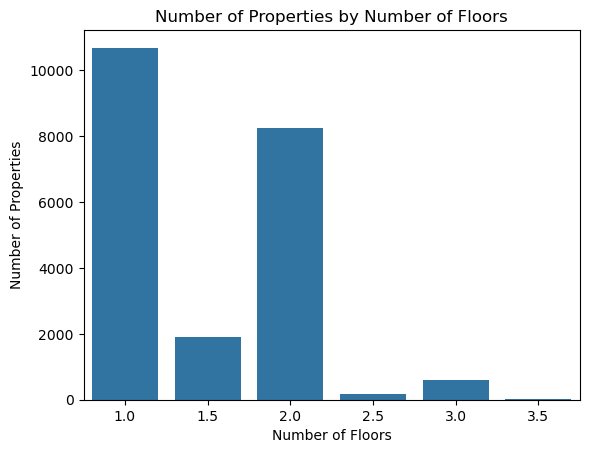

In [97]:
sns.countplot(df, x='floors', color='tab:blue')
plt.title("Number of Properties by Number of Floors")
plt.xlabel("Number of Floors")
plt.ylabel("Number of Properties")
plt.show()

b)

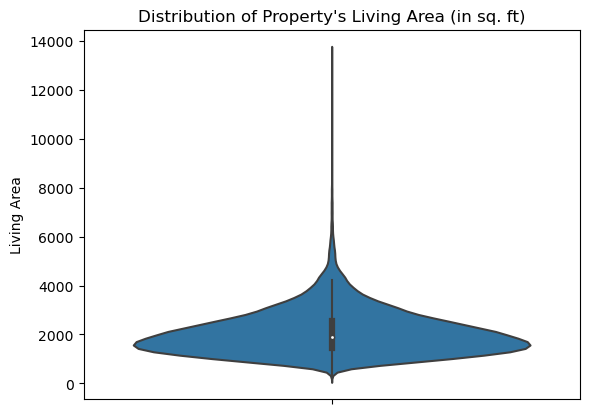

In [98]:
sns.violinplot(df, y='sqft_living')
plt.title("Distribution of Property's Living Area (in sq. ft)")
plt.ylabel("Living Area")
plt.show()

c)

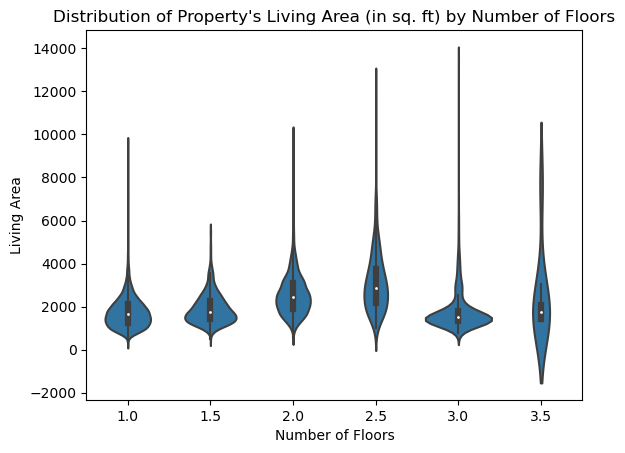

In [99]:
sns.violinplot(df, x='floors', y='sqft_living', color='tab:blue')
plt.title("Distribution of Property's Living Area (in sq. ft) by Number of Floors")
plt.xlabel("Number of Floors")
plt.ylabel("Living Area")
plt.show()